# 把Numpy转化为Torch

In [1]:
import torch
import numpy as np
np_data = np.arange(6).reshape((2,3))#range()是python的内置函数，其返回值是range可迭代对象,arange()是Numpy库中的函数，其返回值是数组对象
torch_data = torch.from_numpy(np_data)    #从numpy中获得数据，可以用torch.from_numpy()
tensor2array = torch_data.numpy()

pytorch中张量是什么意思呢？torch.tensor是一种包含单一数据类型元素的多维矩阵。

Torch定义了七种CPU张量类型和八种GPU张量类型,这里我们就只讲解一下CPU中的，其实GPU中只是中间加一个cuda即可，如torch.cuda.FloatTensor：

torch.FloatTensor(2,3) 构建一个2*3 Float类型的张量
torch.DoubleTensor(2,3) 构建一个2*3 Double类型的张量
torch.ByteTensor(2,3) 构建一个2*3 Byte类型的张量
torch.CharTensor(2,3) 构建一个2*3 Char类型的张量
torch.ShortTensor(2,3) 构建一个2*3 Short类型的张量
torch.IntTensor(2,3) 构建一个2*3 Int类型的张量
torch.LongTensor(2,3) 构建一个2*3 Long类型的张量
torch.Tensor是默认的tensor类型（torch.FloatTensor）的简称。



In [2]:
print("numpy形式:\n",np_data)
print("tenor形式:\n",torch_data)
print("tensor转numpy:\n",tensor2array)

numpy形式:
 [[0 1 2]
 [3 4 5]]
tenor形式:
 tensor([[0, 1, 2],
        [3, 4, 5]])
tensor转numpy:
 [[0 1 2]
 [3 4 5]]


In [3]:
a=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
b=np.reshape(a,(2,-1))
print(a)
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [4]:
a = np.arange(1,13)
print(a)
b = np.reshape(a,(2,-1))
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [5]:
data = [-3,-2,3,6]
tensor = torch.FloatTensor(data)       #转换成32位浮点tensor

print("numpy:\n",np.abs(data))
print("torch:\n",torch.abs(tensor))

numpy:
 [3 2 3 6]
torch:
 tensor([3., 2., 3., 6.])


In [6]:
print("numpy:\n",np.sin(data))
print("torch:\n",torch.sin(tensor))

numpy:
 [-0.14112001 -0.90929743  0.14112001 -0.2794155 ]
torch:
 tensor([-0.1411, -0.9093,  0.1411, -0.2794])


In [7]:
print("numpy:\n",np.mean(data))
print("torch:\n",torch.mean(tensor))

numpy:
 1.0
torch:
 tensor(1.)


In [8]:
import torch
import numpy as np

data = [[2,3],[4,5]]
tensor = torch.FloatTensor(data)    #32位浮点数

print("numpy:\n",np.matmul(data,data))    #data.dot(data)也可以 注意要把list的data变成numpy形式：data = np.array(data)
print("torch:\n",torch.mm(tensor,tensor))

numpy:
 [[16 21]
 [28 37]]
torch:
 tensor([[16., 21.],
        [28., 37.]])


【注意】如果是直接对列表（用逗号连接）处理，内积直接用np.matmul(data,data)
       如果是用data.dot(data)则需要保证data是数组的形式

# Variable

In [ ]:
import torch
from torch.autograd import Variable    # torch 中 Variable 模块

tensor = torch.FloatTensor([[1,2],[3,4]])  #先生鸡蛋
variable = Variable(tensor,requires_grad = True) #把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度

print(tensor)
print(variable)

autograd包是PyTorch中神经网络的核心, 它可以为基于tensor的的所有操作提供自动微分的功能, 这是一个逐个运行的框架, 意味着反向传播是根据你的代码来运行的, 并且每一次的迭代运行都可能不同.
autograd.Variable 是包的中央类, 它包裹着Tensor, 支持几乎所有Tensor的操作,并附加额外的属性, 在进行操作以后, 通过调用.backward()来计算梯度, 通过.data来访问原始raw data (tensor), 并将变量梯度累加到.grad

In [15]:
import torch
from torch.autograd import Variable    # torch 中 Variable 模块

tensor = torch.FloatTensor([[1,2],[3,4]])  #先生鸡蛋
variable = Variable(tensor,requires_grad = True) #把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度

t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)

print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [16]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad = True)

t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)

print(t_out)
print(v_out)

v_out.backward()
print(v_out)
print(variable.grad)   #variable的梯度

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)
tensor(7.5000, grad_fn=<MeanBackward0>)
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [17]:
print(variable)          #  Variable 形式
print(variable.data)     # tensor 形式
print(variable.data.numpy())   # numpy 形式

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


# 激活函数

In [7]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.linspace(-5,5,200)     #返回一个一维的tensor（张量），这个张量包含了从start到end，分成steps个线段得到的向量
x = Variable(x)     #把数据放进Variable

In [8]:
#print(x)
x_np = x.data.numpy()     #把Variable里的tensor变成numpy形式
#print(x_np)
y_relu = F.relu(x).data.numpy()   #torch的数据格式不能被matplotlib.pyplot识别，因此把进过激活函数后的tensor（Variable.data）转化为numpy
#print(y_relu)
y_sigmoid = F.sigmoid(x).data.numpy()    #激活函数处理的还是torch的形式
#print(F.sigmoid(x))
#print(y_sigmoid)
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
#print(F.softplus(x))

# 四种激励函数可视化

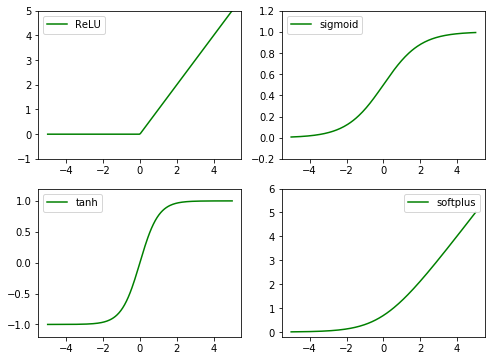

In [11]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(8,6)) #指定图片编号和图片长宽

plt.subplot(221)
plt.plot(x_np,y_relu,c='green',label='ReLU')    #横纵坐标，颜色，标签
plt.ylim(-1,5)   #设置y坐标范围
plt.legend(loc = 'best')  #’loc’参数有多种，’best’表示自动分配最佳位置

plt.subplot(222)
plt.plot(x_np,y_sigmoid,c='green',label='sigmoid')   
plt.ylim(-0.2,1.2)
plt.legend(loc = 'best')

plt.subplot(223)
plt.plot(x_np,y_tanh,c='green',label='tanh')
plt.ylim(-1.2,1.2)
plt.legend(loc = 'best')

plt.subplot(224)
plt.plot(x_np,y_softplus,c='green',label='softplus')
plt.ylim(-0.2,6)
plt.legend(loc = 'best')

plt.show()

# 回归

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

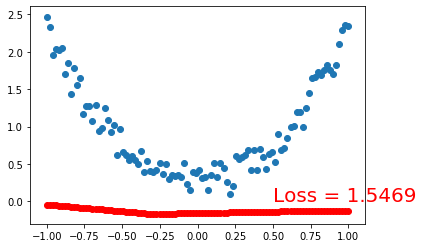

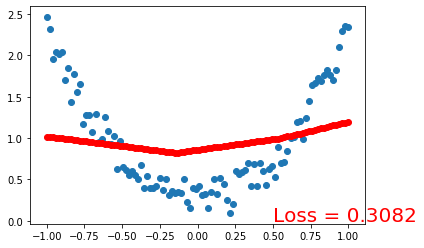

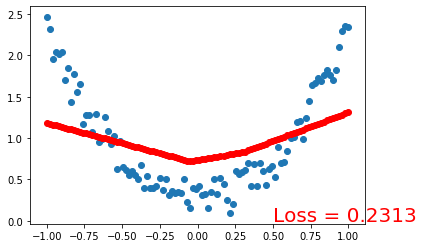

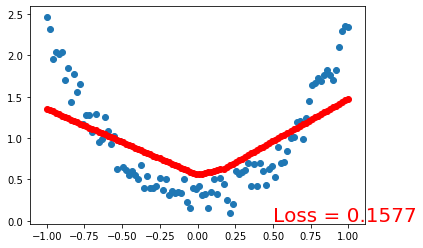

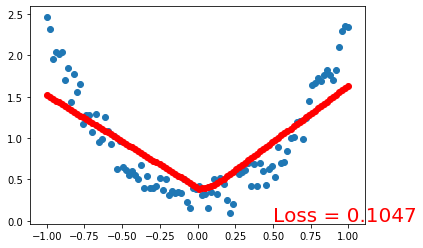

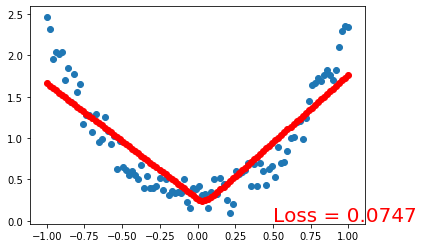

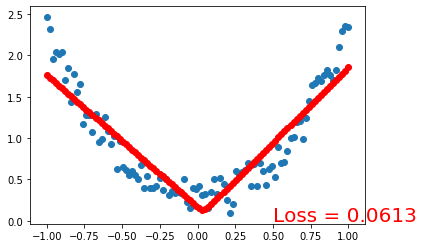

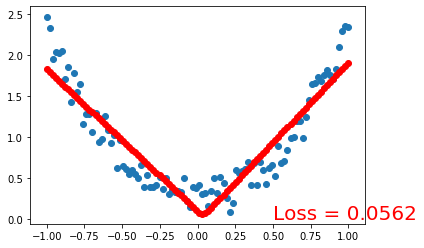

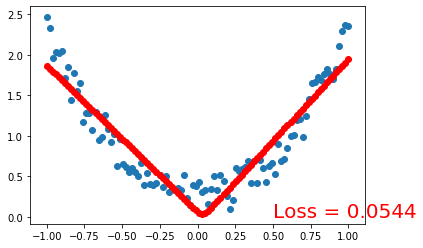

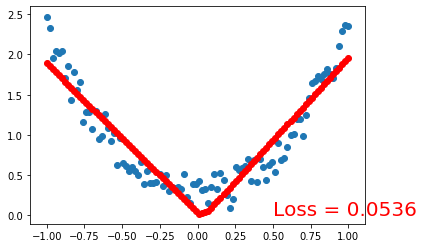

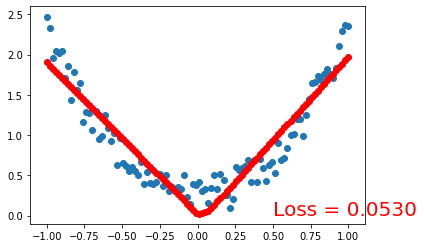

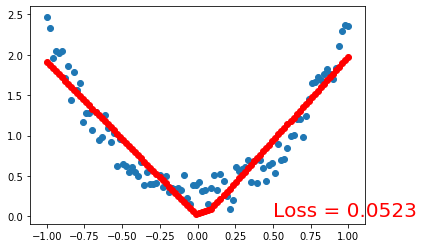

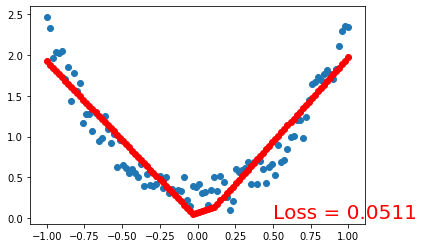

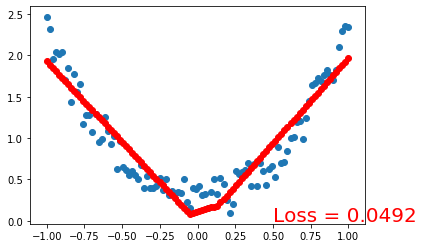

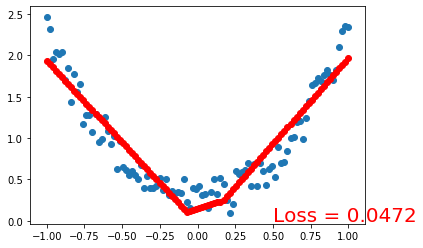

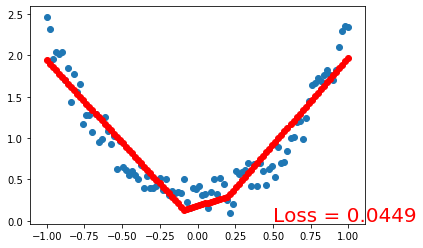

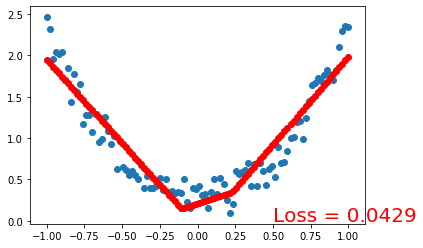

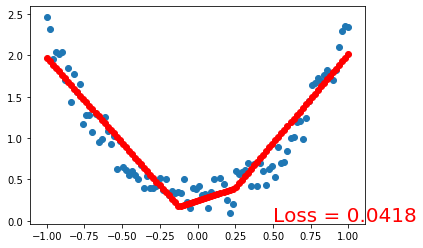

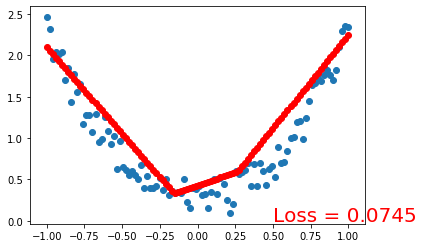

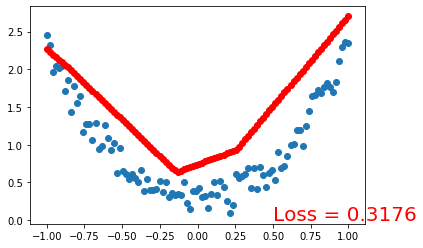

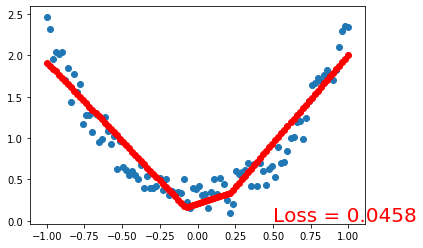

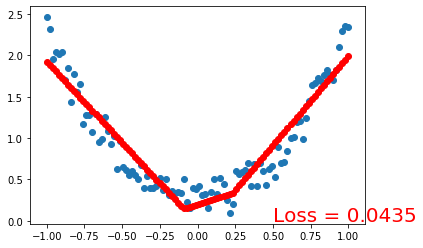

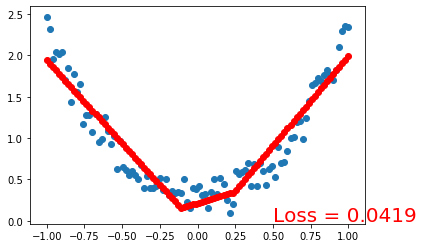

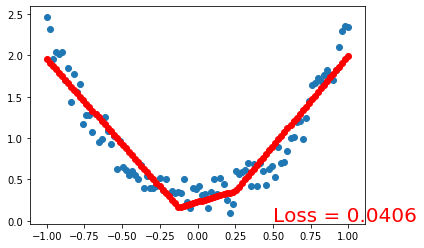

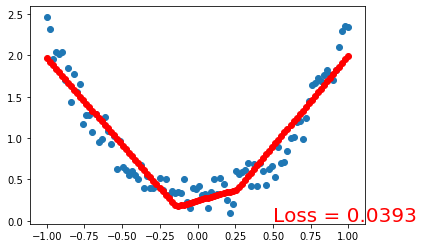

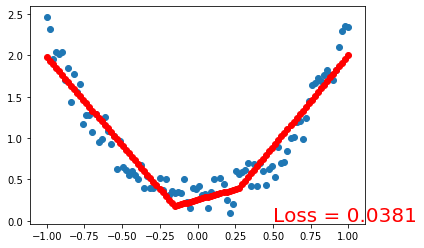

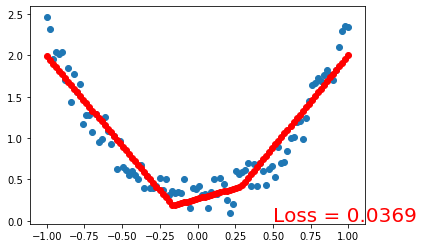

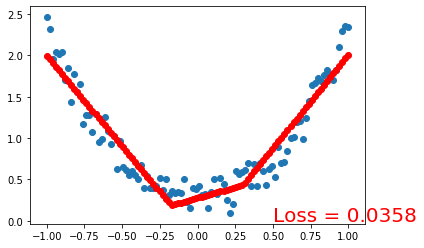

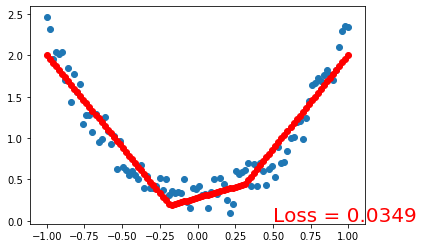

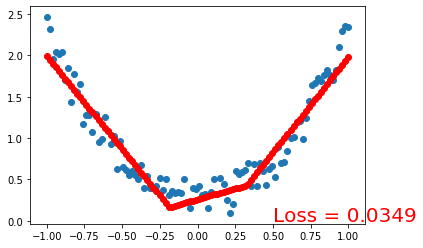

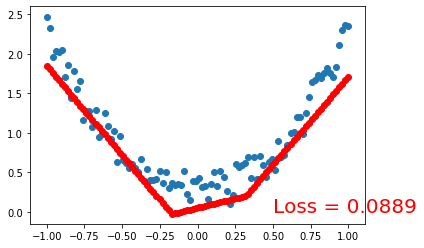

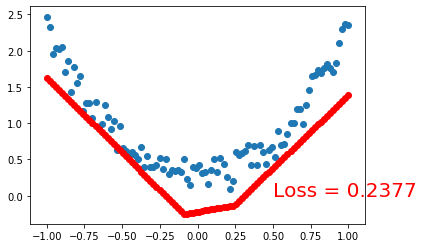

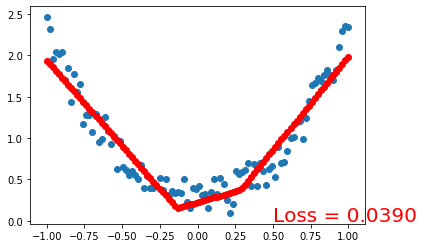

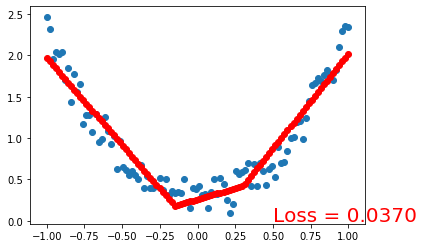

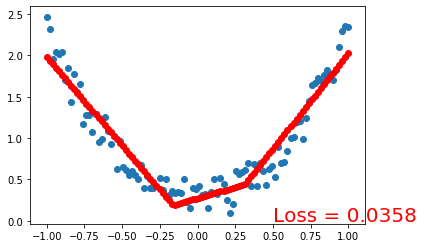

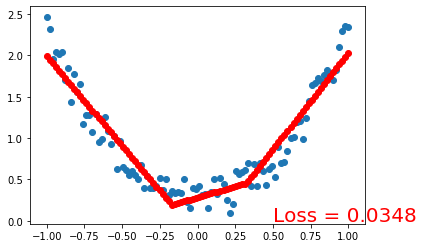

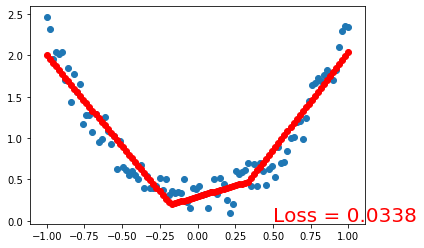

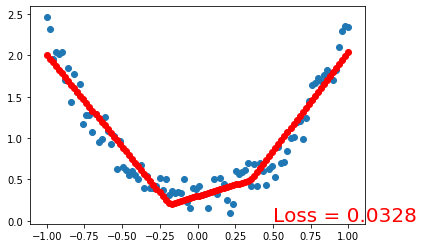

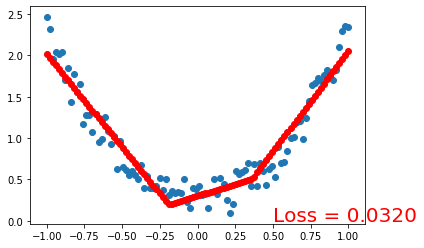

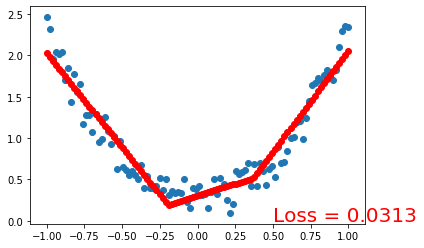

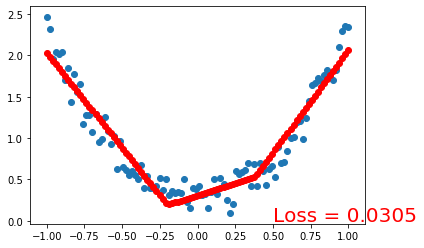

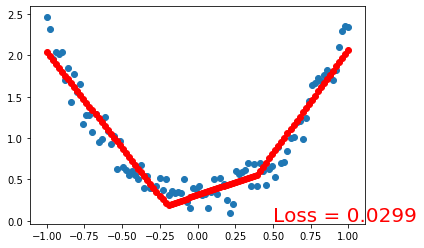

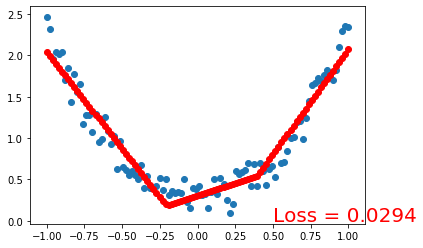

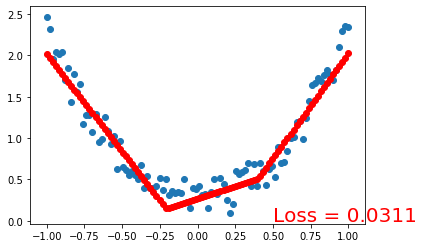

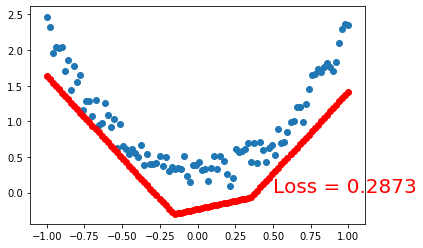

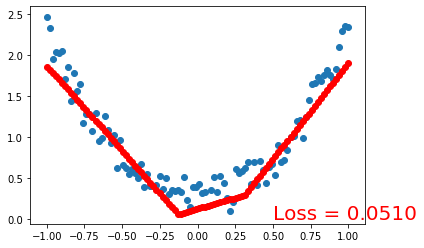

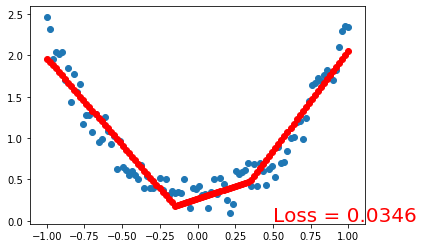

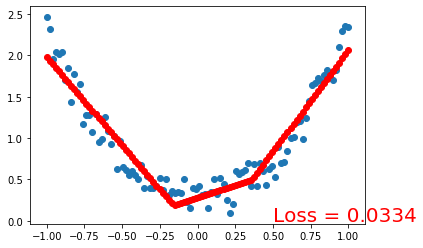

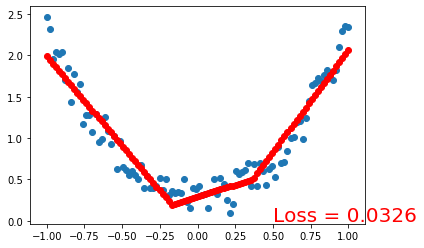

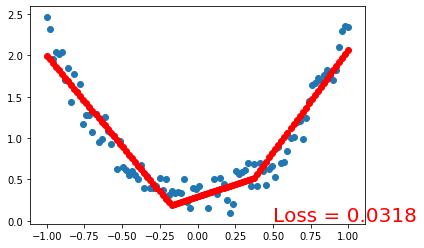

In [2]:
import torch
import matplotlib.pyplot as plt

#制造一些数据
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)   #torch.Size([100, 1]) #把[a,b,c]变成[[a,b,c]]
#print(x)
y = 2*(x.pow(2)) + 0.5*torch.rand(x.size())  #torch.rand为均匀分布，返回一个张量，包含了从区间[0, 1)的均匀分布中抽取的一组随机数。张量的形状由参数sizes定义
#print(y)
#画图
# plt.scatter(x.data.numpy(),y.data.numpy())  
# plt.show()

from torch import nn
import torch.nn.functional as F

class NetWork(nn.Module):

    def __init__(self,n_input,n_hidden,n_output):
        super(NetWork,self).__init__()
        self.hidden = nn.Linear(n_input,n_hidden)
        self.output_for_predict = nn.Linear(n_hidden,n_output)

    def forward(self,x):
        x = F.relu(self.hidden(x))   #对x进入隐层后的输出应用激活函数（相当于一个筛选的过程）
        output = self.output_for_predict(x)    #做线性变换，将维度为1
        return output

network = NetWork(n_input = 1,n_hidden = 8, n_output = 1)
print(network)   #打印模型的层次结构

plt.ion()   # 打开交互模式
'''
如果在脚本中使用ion()命令开启了交互模式，没有使用ioff()关闭的话，则图像会一闪而过，并不会常留。
要想防止这种情况，需要在plt.show()之前加上ioff()命令
'''
plt.show()

optimizer = torch.optim.SGD(network.parameters(),lr = 0.2)    #随机梯度下降
criterion = torch.nn.MSELoss()   #均方误差，用于计算预测值与真实值之间的误差

for i in range(500):   #训练步数（相当于迭代次数）
    predication = network(x)
    loss = criterion(predication, y)    #predication为预测的值，y为真实值

    optimizer.zero_grad()
    loss.backward()      #反向传播，更新参数
    optimizer.step()     #将更新的参数值放进network的parameters

    if i % 10 == 0:
        plt.cla()   # 清坐标轴
        plt.scatter(x.data.numpy(),y.data.numpy())     #实际的数据x,y用散点图画
        plt.plot(x.data.numpy(),predication.data.numpy(),'ro', lw=5)   ##画预测曲线，用红色o作为标记
        plt.text(0.5,0,'Loss = %.4f' % loss.data.numpy(), fontdict = {'size': 20, 'color':  'red'})  #x,y:表示坐标值上的值
        plt.pause(0.1)


# 分类

In [6]:
import torch
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)

x0 = torch.normal(2*n_data, 1)        #均值和方差
y0 = torch.zeros(100)         #标签为0

x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)          #标签为1

x = torch.cat((x0,x1),0).type(torch.FloatTensor)    #torch.cat是将两个张量（tensor）拼接在一起，cat是concatnate的意思，即拼接，联系在一起
#print(x)
y = torch.cat((y0,y1),).type(torch.LongTensor)
#print(y)

from torch import nn
import torch.nn.functional as F

class NetWork(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):     #定义神经元个数
        super(NetWork,self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output_for_predict = nn.Linear(n_hidden, n_output)

    def forward(self, x):     #导入数据x
        x = F.relu(self.hidden(x))        #全链接+激活函数
        x = self.output_for_predict(x)
        return x
network = NetWork(n_input = 1,n_hidden = 8, n_output = 2)   #对于二分类问题n_output为2
print(network)  #打印网络结构


import matplotlib.pyplot as plt

plt.ion()
plt.show()

optimizer = torch.optim.SGD(network.parameters(), lr = 0.01)    #SGD优化器
criterion = nn.CrossEntropyLoss()      #损失函数

for i in range(200):
    out = network(x)   #把数据放入模型得到预测值
    loss = criterion(out, y)   #计算预测值与真是值之间的误差
    optimizer.zero_grad()
    loss.backward()     #误差的反向传递
    optimizer.step()   #更新参数到network.parameters()

    if i % 5 == 0:
        plt.cla()
        predication = torch.max(F.softmax(out),1)[1]       #
        '''
        torch.max(a,0)返回每一列中最大值的那个元素，且返回索引（返回最大元素在这一列的行索引）。
        返回的最大值和索引各是一个tensor，一起构成元组(Tensor, LongTensor)
        torch.max(a,1)返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引）
        '''
        print(torch.max(F.softmax(out),1))
        print(predication)
        pred_y = predication.data.numpy().squeeze()
        target_y = y.data.numpy()    #真实值
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y)
        accuracy = sum(pred_y == target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size':20,'color':'red'})
        plt.pause(0.5)
        
plt.ioff()
plt.show()

NetWork(
  (hidden): Linear(in_features=1, out_features=8, bias=True)
  (output_for_predict): Linear(in_features=8, out_features=2, bias=True)
)


RuntimeError: size mismatch, m1: [200 x 2], m2: [1 x 8] at ../aten/src/TH/generic/THTensorMath.cpp:136

# torch.save

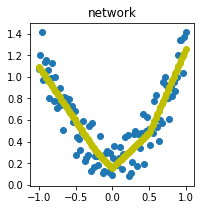

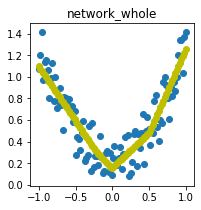

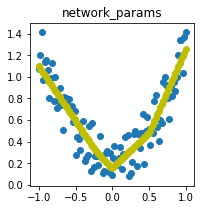

In [11]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.manual_seed(11)    # 使每次得到的随机数是固定的。但是如果不加上torch.manual_seed这个函数调用的话，打印出来的随机数每次都不一样


x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # [100] -> [100,1]
y = x.pow(2) + 0.5*torch.rand(x.size())  # y的形状与x一样


def make_and_save_model():
    
    network = torch.nn.Sequential(
        torch.nn.Linear(1, 8),
        torch.nn.ReLU(),
        torch.nn.Linear(8, 1)
    )
    optimizer = torch.optim.SGD(network.parameters(), lr=0.3)   #优化器
    criterion = torch.nn.MSELoss()     #损失函数

    # 训练
    for i in range(200):
        prediction = network(x)      #数据放入模型后得到预测值
        loss = criterion(prediction, y)    #计算预测值与真实值之间的误差
        optimizer.zero_grad()       #清空梯度
        loss.backward()           #误差反向传播
        optimizer.step()          #更新参数
    torch.save(network, 'network.pth')  # 保存整个网络
    torch.save(network.state_dict(), 'network_params.pth')   # 只保存网络中的参数
    
    plt.figure(1, figsize = (10,3))
    plt.subplot(131)
    plt.title('network')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'yo' , lw = 5)
    plt.pause(1)

def load_whole_model():

    network_whole = torch.load('network.pth')
    prediction = network_whole(x)
    
    plt.figure(1, figsize = (10,3))
    plt.subplot(132)
    plt.title('network_whole')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'yo' , lw = 5)
    plt.pause(1)

def load_only_params():
    
    network_params = torch.nn.Sequential(
        torch.nn.Linear(1, 8),
        torch.nn.ReLU(),
        torch.nn.Linear(8, 1)
    )

    network_params.load_state_dict(torch.load('network_params.pth'))
    prediction = network_params(x)
    
    plt.figure(1, figsize = (10,3))
    plt.subplot(133)
    plt.title('network_params')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'yo' , lw = 5)

make_and_save_model()
load_whole_model()
load_only_params()

# DataLoader

In [19]:
import torch
from torch.utils.data import DataLoader, TensorDataset
torch.manual_seed(1)

BATCH_SIZE = 8     #意味着一个epoch有两个迭代
x = torch.linspace(1,20,20)
y = torch.linspace(20,1,20)

torch_dataset = TensorDataset(x,y)      

loader = DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 4,
    shuffle = True     #shuffle放在num_workers前面亦可
)

for epoch in range(3):
    for step , (batch_x, batch_y) in enumerate(loader):    #stepb表示一个eopch中的迭代次数
        print('Epoch:',epoch, '|Step:',step,'|batch x:',batch_x.numpy(),'|batch y:',batch_y.numpy() )

Epoch: 0 |Step: 0 |batch x: [ 5. 10.  2. 11. 16. 17. 14.  6.] |batch y: [16. 11. 19. 10.  5.  4.  7. 15.]
Epoch: 0 |Step: 1 |batch x: [ 8.  4.  9. 20. 18. 19. 15.  3.] |batch y: [13. 17. 12.  1.  3.  2.  6. 18.]
Epoch: 0 |Step: 2 |batch x: [ 7.  1. 13. 12.] |batch y: [14. 20.  8.  9.]
Epoch: 1 |Step: 0 |batch x: [ 5.  2.  3. 12. 17. 20. 19.  6.] |batch y: [16. 19. 18.  9.  4.  1.  2. 15.]
Epoch: 1 |Step: 1 |batch x: [ 1. 10. 14.  7. 11. 18. 15. 13.] |batch y: [20. 11.  7. 14. 10.  3.  6.  8.]
Epoch: 1 |Step: 2 |batch x: [ 4. 16.  8.  9.] |batch y: [17.  5. 13. 12.]
Epoch: 2 |Step: 0 |batch x: [ 4. 14.  3. 13.  6. 10. 15. 12.] |batch y: [17.  7. 18.  8. 15. 11.  6.  9.]
Epoch: 2 |Step: 1 |batch x: [ 1.  8.  5. 19. 20. 16. 18. 11.] |batch y: [20. 13. 16.  2.  1.  5.  3. 10.]
Epoch: 2 |Step: 2 |batch x: [ 2. 17.  9.  7.] |batch y: [19.  4. 12. 14.]


# Optimizer 优化器

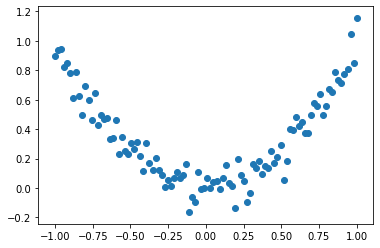

In [47]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn

torch.manual_seed(111)

#可人为设定大小的超参数
LR = 0.02
BATCH_SIZE = 8
EPOCHS = 10

x = torch.unsqueeze(torch.linspace(-1,1,100), dim = 1)  #unsqueeze() 是为了体现batch的维度
y = x.pow(2) + 0.08*torch.normal(torch.zeros(x.size()))

plt.scatter(x.numpy(), y.numpy())
plt.show()

In [76]:
dataset = TensorDataset(x, y)
data_loader = DataLoader(
        dataset,
        batch_size = BATCH_SIZE,
        shuffle = True,
        num_workers = 2)

In [77]:
class NetWork(nn.Module):
    
    def __init__(self):
        super(NetWork, self).__init__()
        self.hidden = nn.Linear(1,8)
        self.output = nn.Linear(8,1)
    
    def forward(self,x):
        output = F.relu(self.hidden(x))  #经过一个隐藏层后再用ReLU激活
        output = self.output(output)
        return output
    
#实例化四个模型
network_for_SGD = NetWork()
network_for_Momentum = NetWork()
network_for_RMSprop = NetWork()
network_for_Adam = NetWork()

networks = [network_for_SGD, network_for_Momentum, network_for_RMSprop, network_for_Adam]  #放入list中以便于for循环

In [78]:
optimizer_for_SGD = torch.optim.SGD(network_for_SGD.parameters(), lr = LR)
network_for_Momentum = torch.optim.SGD(network_for_Momentum.parameters(), lr = LR, momentum = 0.8)
network_for_RMSprop = torch.optim.RMSprop(network_for_RMSprop.parameters(), lr = LR, alpha = 0.9)
network_for_Adam = torch.optim.Adam(network_for_Adam.parameters(), lr = LR, betas = (0.9,0.99))

optimizers = [optimizer_for_SGD, network_for_Momentum, network_for_RMSprop, network_for_Adam]  #把优化器放入list中

loss_func = torch.nn.MSELoss()    #损失函数用均方误差（适用于回归）
loss_lists = [[],[],[],[]]       #用于记录误差

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


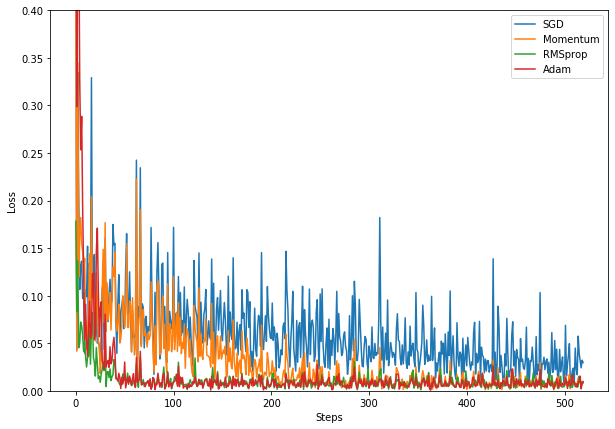

In [82]:
for epoch in range(EPOCHS):
    print('Epoch:',epoch)
    for step, (b_x, b_y) in enumerate(data_loader):
        
        #b_x = Variable(b_x)
        #b_y = Variable(b_y)
        
        for network, optimizer, loss_list in zip(networks, optimizers, loss_lists):  #把三个列表捆在一起再一个一个拿出来
            output = network(b_x)
            loss = loss_func(output, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data.numpy())

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
plt.figure(1, figsize = (10,7))
for i,l_his in enumerate(loss_lists):
    plt.plot(l_his, label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim(0,0.4)
plt.show()

# Dropout 缓解过拟合

In [2]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(123)

#制造训练数据
x = torch.unsqueeze(torch.linspace(-1,1,20), 1)
y = x + 0.3*torch.normal(torch.zeros(20,1), torch.ones(20,1))     #均值为0， 方差为1

#制造测试数据
test_x = torch.unsqueeze(torch.linspace(-1,1,20), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(20,1), torch.ones(20,1))

#可视化数据
plt.scatter(x.data.numpy(), y.data.numpy(), c = 'magenta', s = 50, alpha = 0.5, label = "train")
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c = 'cyan', s = 50, alpha = 0.5, label = "test")
plt.legend(loc = 'upper left')
plt.ylim((-2.5, 2.5))
plt.show()

<Figure size 640x480 with 1 Axes>

## torch.normal
返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。
均值means是一个张量，包含每个输出元素相关的正态分布的均值。
std是一个张量，包含每个输出元素相关的正态分布的标准差。
均值和标准差的形状不须匹配，但每个张量的元素个数须相同。

In [3]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1,300),
    torch.nn.ReLU(),
    torch.nn.Linear(300,300),
    torch.nn.ReLU(),
    torch.nn.Linear(300,1)
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1,300),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(300,300),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(300,1)
)

In [ ]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr = 0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr = 0.01)

loss_func = torch.nn.MSELoss()

for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t % 10 == 0:   #每10步画一次图
        #将神经网络转换成测试形式,画好图之后改回训练形式
        net_overfitting.eval()        # 因为 drop 网络在 train 的时候和 test 的时候参数不一样.
        net_dropped.eval()
        
        test_pred_ofit = net_overfitting(test_x)    #测试数据放入模型，得到模型的预测值 
        test_pred_drop = net_dropped(test_x)
        
        #可视化操作
        plt.scatter(x.data.numpy(), y.data.numpy(), c = 'magenta', s = 50, alpha = 0.5, label = "train" )
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(),c = 'cyan', s = 50, alpha = 0.5, label = "test" )
        
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(),'r-',lw=5)
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(),'b--',lw=5)
        
        plt.text(0,-1.2,'overfitting loss = %.4f' % loss_func(test_pred_ofit,test_y),fontdict = {'size':20,'color':'red'})
        plt.text(0,-1.5,'dropout loss = %.4f' % loss_func(test_pred_drop,test_y),fontdict={'size':20,'color':'blue'})
        plt.legend(loc = 'upper left')
        plt.ylim(-2.5,2.5)
        plt.pause(0.1)
        
        #net_overfitting.train()    #预测完后，把神经网络放回去再训练
        #net_dropped.train()